#id: puddleworld-v0

Implementation of Q learning

Direction considers as:
           NORTH
            ^
            |
            |
WEST <------ ------>EAST
            |
            |
            ~
          SOUTH

In [1]:
# https://github.com/ajithalbus/Options

import gym
import gridworlds
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
# d = {4: 4, 5: 5, 6: 4, 7: 5, 8: 4, 9: 5, 10: 4, 11: 5}
# b = [4: [4,6,8,10], 5: [5,7,9,11]]
class SmdpQL:
    def __init__(self, gamma, alpha, number_of_episodes, epsilon):
        self.Q_values = np.zeros((6, env.observation_space.n+1))
        self.gamma = gamma
        self.alpha = alpha
        self.number_of_episodes = number_of_episodes
        self.epsilon = epsilon
#         self.opt_to_ind = {4: 4, 5: 5, 6: 4, 7: 5, 8: 4, 9: 5, 10: 4, 11: 5}
        self.opt_to_ind = [{ 4: 4, 5: 5 }, { 6: 4 , 7: 5}, { 8: 4, 9: 5}, { 10:4, 11: 5}]
#         self.ind_to_opt =  {4: [4,6,8,10], 5: [5,7,9,11]}
        self.ind_to_opt = [ { 4: 4, 5: 5}, { 4: 6, 5: 7}, { 4: 8, 5: 9}, { 4: 10, 5: 11}]
        self.opt_to_ind_hallway = [{ 4: 4, 7: 5 }, { 6: 4, 9: 5 }, { 8: 4, 11: 5 }, { 5: 4, 10: 5 }]
#         self.ind_to_opt_hallway = {4:[4,6,8,5],5:[7,9,11,10]}
        self.ind_to_opt_hallway = [{ 4: 4, 5: 7 }, { 4: 6, 5: 9 }, { 4: 8, 5: 11 }, { 4: 5, 5: 10 }]
        
    
    def epsilon_option(self,env, room, in_hallway):
   
        if in_hallway :
            l = env.hallway_option_set[room]
        else :
            l = env.option_set[room]
        
        if np.random.uniform(0,1) < self.epsilon:
            option = np.random.choice(l)
            
        else:
            
            
            if sum(self.Q_values[:,env.state]) ==0.0 :
                option = np.random.choice(l)
#                 print("bj", option)
            else :
                option = np.argmax(self.Q_values[:,env.state])
                if option > 3 :
                    if in_hallway :

                            option = self.ind_to_opt_hallway[room][option]
                    else :    


                            option = self.ind_to_opt[room][option]


        return option
    
    def test_option(self,env, current_state):
        
        option = np.argmax(self.Q_values[:,current_state])
        return option
    
    def update_Q_values(self,current_state, current_option, reward_generated, value, in_hallway, room,step_took = 1 ):
#         print("current_option",current_option, "room", room, "in_hallway", in_hallway)
        if current_option > 3:
            if in_hallway :

                        current_option = self.opt_to_ind_hallway[room][current_option]
            else :    


                        current_option = self.opt_to_ind[room][current_option]
            
        error = reward_generated + ((self.gamma**step_took)*value) - self.Q_values[current_option][current_state]
        self.Q_values[current_option][current_state] = self.Q_values[current_option][current_state] + self.alpha*error
        

    
    def run_episode(self, env):
#         print("yes")
        self.epsilon = self.epsilon-9.9e-5
        current_state = env.reset()
#         print("cur", current_state)
        in_hallway = env.in_hallway_index()
        [room, coord]= env.decode(env.state, in_hallway=in_hallway)
#         print("room",room, "coord",coord)
        
        step_count = 0
        total_reward = 0
        i =0
#         maxs = -1
#         mo = set()
        loc_option = None
        while i<1000:
            
            in_hallway = env.in_hallway_index()
            [room, coord]= env.decode(env.state, in_hallway=in_hallway)
#             print("room",room, "coord",coord)
            if loc_option == None :
                current_option = self.epsilon_option(env, room, in_hallway)
                op_step_count = 1
                rewards = 0
#                 print("new_option",current_option)
            else :
                op_step_count+=1
                current_option = loc_option
#                 print("loc_option",loc_option)
            
#             current_option = self.epsilon_option(env, room, in_hallway)
#             print("current_option", current_option)
            next_state, reward, status,dicts   = env.step(current_option )
            rewards = rewards + reward*self.gamma**(op_step_count-1)
#             mo.add(next_state)
#             if next_state >  maxs :
#                 maxs = next_state
#             if next_state>104:
#                 print("hvhjcbwhebcwjebwkbjwkbfkwfbjk", env.state)
            if dicts[0] == True:
                value = np.max(self.Q_values[:,next_state])
                self.update_Q_values(current_state, current_option, rewards,value,  in_hallway, room, op_step_count)
                step_count = step_count +1
                i +=1
                total_reward = total_reward + rewards
                
            if status == True:
#                 print("bro")
                break
            if dicts[0] == False :
                loc_option = current_option
            else : 
                loc_option = None
                
            current_state = next_state
            
#         print("maxstate", next_state, len(mo))
            
        return step_count, total_reward
    

    

0


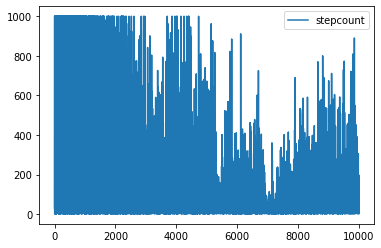

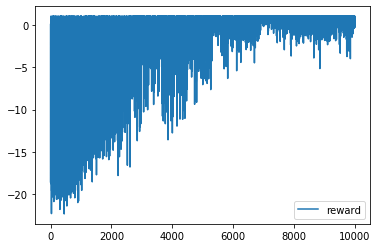

[[-6.96496162e-02 -2.05802524e-02 -3.06026612e-02 -5.28626428e-02
  -7.43513756e-02  2.00547292e-02  5.02661809e-02  6.74781864e-02
   6.14559788e-02  5.15398179e-02  4.40115768e-02  7.37957299e-02
   9.51278681e-02  1.21281376e-01  1.38991515e-01  4.33537206e-02
   8.90340531e-02  1.01178976e-01  1.39067629e-01  1.33140708e-01
   4.38046907e-02  8.51391351e-02  9.87127018e-02  1.09150820e-01
   6.31846017e-02  1.19141610e-01 -3.03297882e-02 -4.38678486e-03
  -1.85333243e-02 -2.54952084e-02 -5.77672174e-02  1.49819747e-01
   1.64278037e-01  6.56837480e-02  3.41557857e-02  8.41033684e-03
   2.19806149e-01  2.70113462e-01  2.51647625e-01  1.26545253e-01
   4.94652513e-02  2.63585898e-01  3.13747122e-01  3.41486599e-01
   2.79939297e-01  1.06493940e-01  3.05749298e-01  3.64754764e-01
   4.13923841e-01  3.43234226e-01  1.00242536e-01  2.75550649e-01
   3.96618703e-01  4.77989731e-01  3.87205686e-01  1.59044871e-01
   5.70595740e-01  4.81408220e-01  5.93076406e-01  6.62075842e-01
   5.82520

In [3]:
env = gym.make('FourRooms-v1')
# goal_position 0: [2,[1,2]](goal2), 1: [1,[6,2]](goal1)
x = np.arange(10000)
y_avg = []
z_avg = []

for i in range(1) :
    goal_position = 0
    env.set_goal(goal_position)
    obj = SmdpQL( gamma = .9, alpha = (1/16), number_of_episodes = 2000, epsilon  = .1)
    

    y = []
    z = []
    for _ in range(10000):

        a, b  = obj.run_episode( env)
#         print(a)
        y.append(a)
        z.append(b)
    y_avg.append(y)
    z_avg.append(z)
    print(i)
    
plt.plot(x, np.mean(y_avg, axis = 0 ), label="stepcount")
plt.legend()
plt.show()
plt.close()
plt.plot(x, np.mean(z_avg, axis = 0 ), label = "reward")
plt.legend()
plt.show()
print(obj.Q_values)

0 hhihhih
1 hhihhih
2 hhihhih
3 hhihhih
4 hhihhih
5 hhihhih
6 hhihhih
7 hhihhih
8 hhihhih
9 hhihhih
10 hhihhih
11 hhihhih


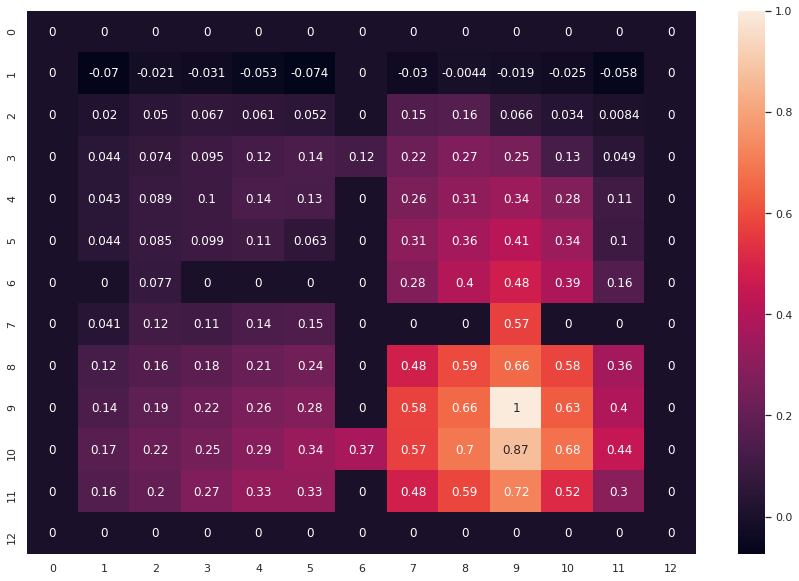

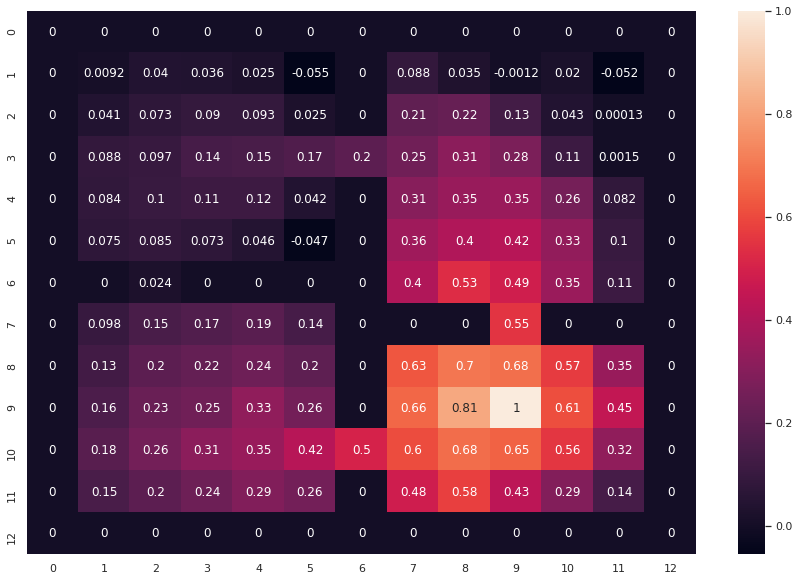

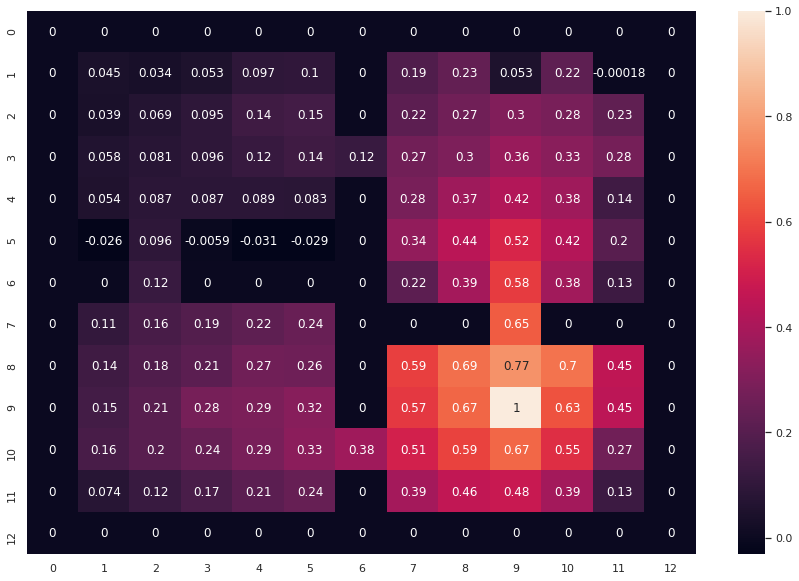

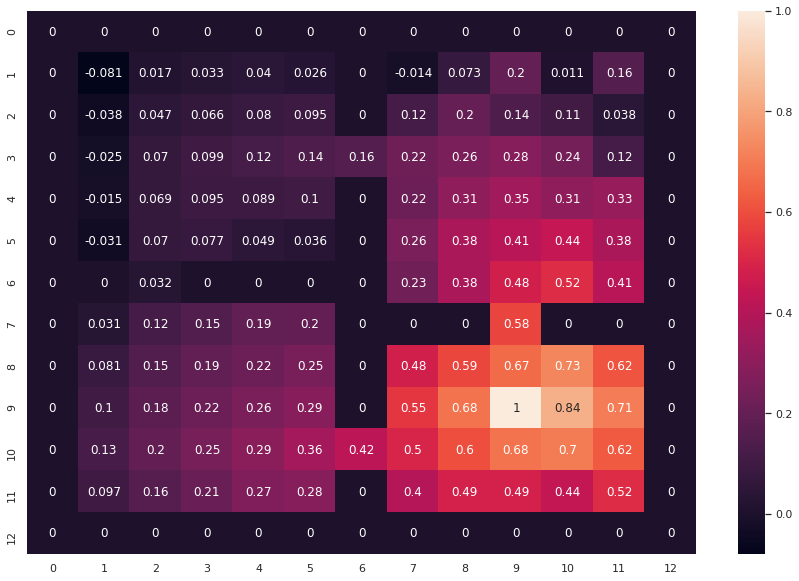

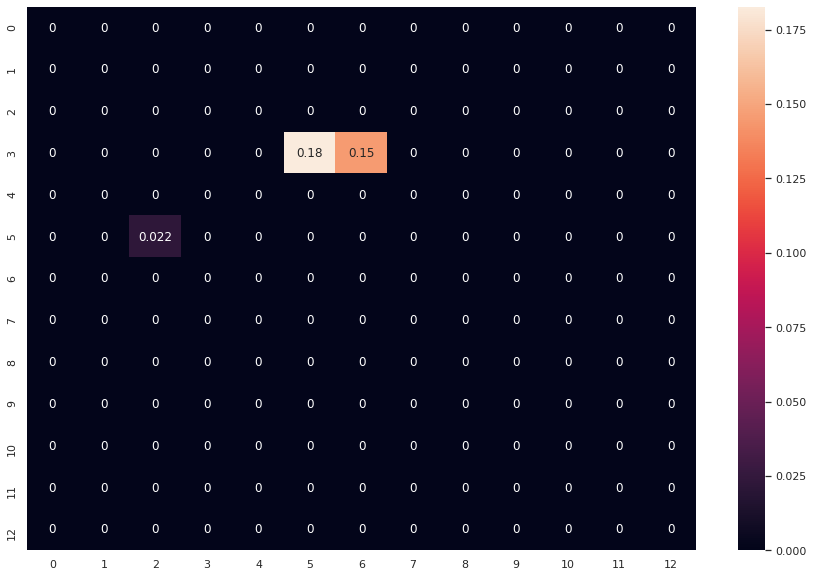

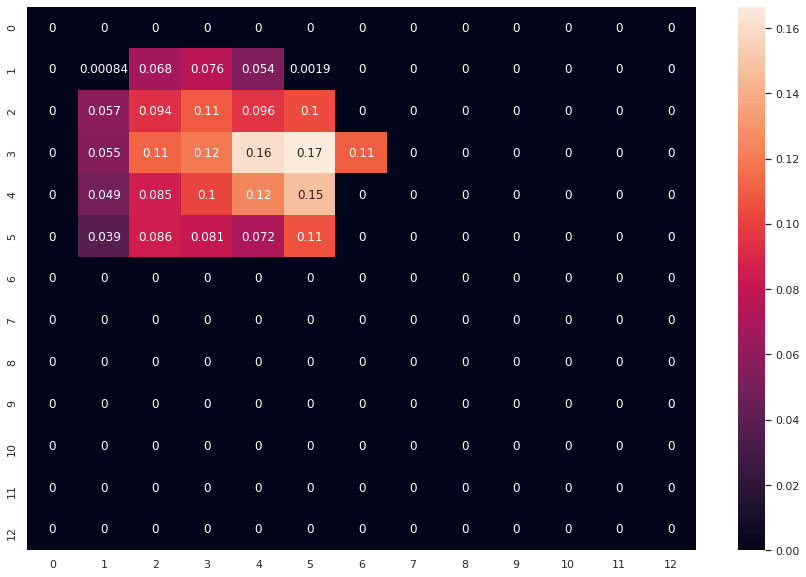

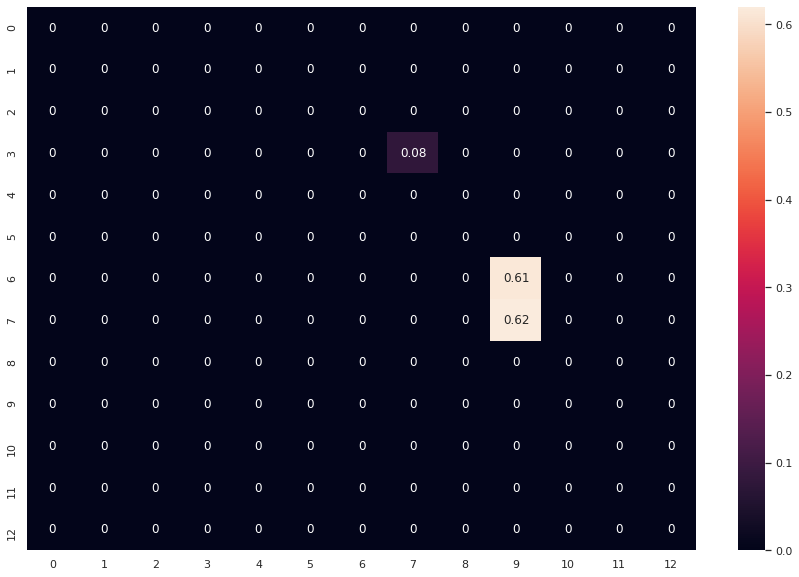

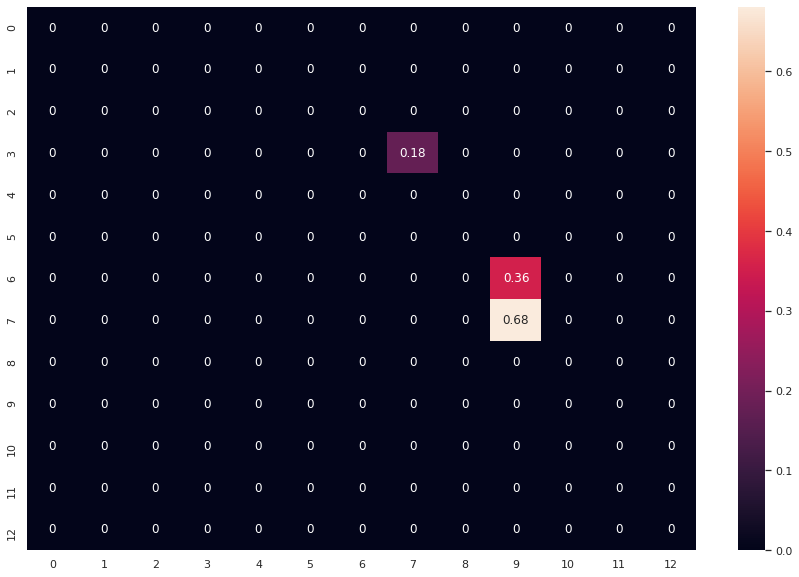

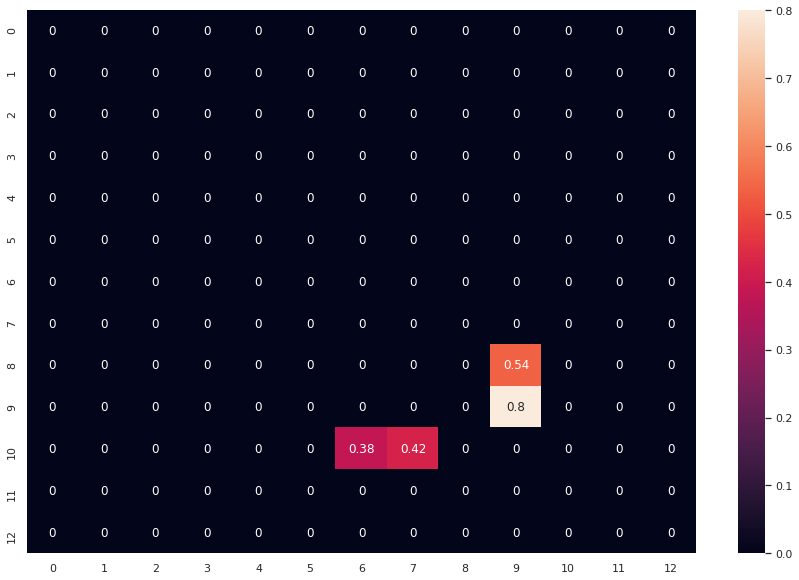

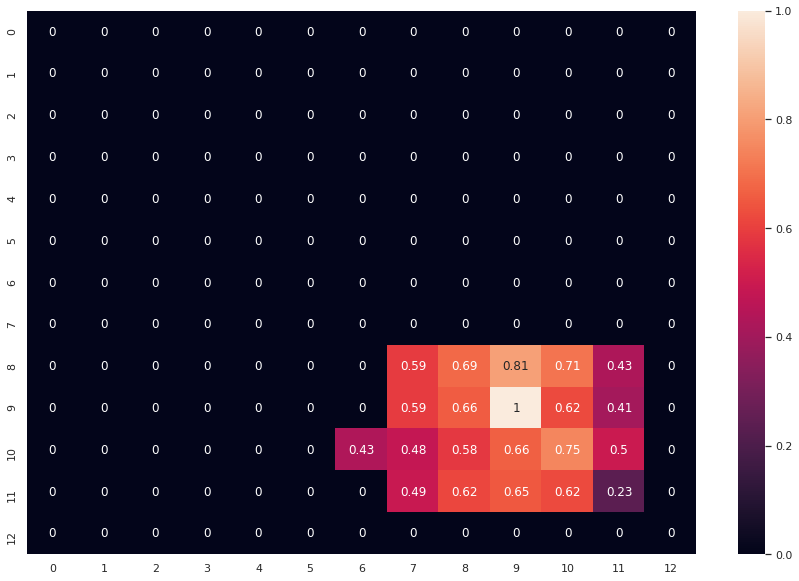

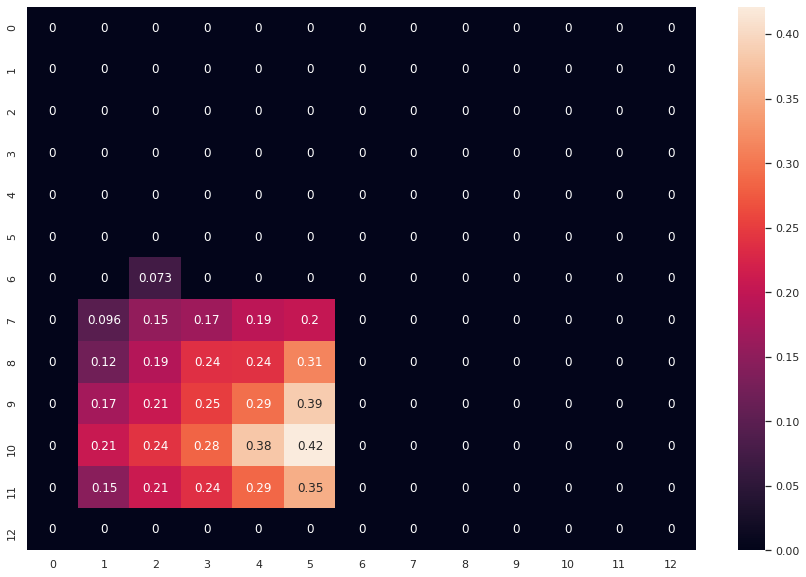

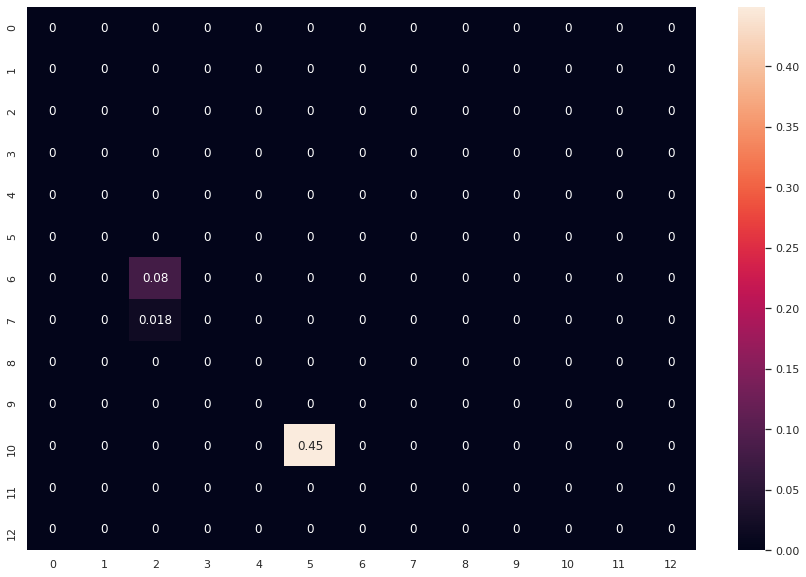

In [4]:
alplots = []
for _ in range(12):
    alplots.append(np.zeros((13,13)))

    
p = env.observation_space.n-1


for i in range(p):
    
    
#     print(max(obj.Q_values[:,i]))
    in_hallway = env.in_hallway_index(i)
    [room, coord]= env.decode(i, in_hallway=in_hallway)

    if room == 0 :        
        alplots[0][coord[0]+1][ coord[1]+1] = obj.Q_values[0,i]
        alplots[1][coord[0]+1][ coord[1]+1] = obj.Q_values[1,i]
        alplots[2][coord[0]+1][ coord[1]+1] = obj.Q_values[2,i]
        alplots[3][coord[0]+1][ coord[1]+1] = obj.Q_values[3,i]
        alplots[4][coord[0]+1][ coord[1]+1] = obj.Q_values[4,i]
        
        alplots[5][coord[0]+1][ coord[1]+1] = obj.Q_values[5,i]
    elif room == 1 :
#         print(max(obj.Q_values[:,i]))
        alplots[0][coord[0]+1][coord[1]+7] = obj.Q_values[0,i]
        alplots[1][coord[0]+1][coord[1]+7] = obj.Q_values[1,i]
        alplots[2][coord[0]+1][coord[1]+7] = obj.Q_values[2,i]
        alplots[3][coord[0]+1][coord[1]+7] = obj.Q_values[3,i]
        alplots[6][coord[0]+1][coord[1]+7] = obj.Q_values[4,i]
        alplots[7][coord[0]+1][coord[1]+7] = obj.Q_values[5,i]
    
    elif room == 2 :
#         print(max(obj.Q_values[:,i]))
        alplots[0][coord[0]+8][coord[1]+7] = obj.Q_values[0,i]
        alplots[1][coord[0]+8][coord[1]+7] = obj.Q_values[1,i]
        alplots[2][coord[0]+8][coord[1]+7] = obj.Q_values[2,i]
        alplots[3][coord[0]+8][coord[1]+7] = obj.Q_values[3,i]
        alplots[8][coord[0]+8][coord[1]+7] = obj.Q_values[4,i]
        alplots[9][coord[0]+8][coord[1]+7] = obj.Q_values[5,i]
    elif room == 3 :
#         print(max(obj.Q_values[:,i]))
        alplots[0][coord[0]+7][coord[1]+1] = obj.Q_values[0,i]
        alplots[1][coord[0]+7][coord[1]+1] = obj.Q_values[1,i]
        alplots[2][coord[0]+7][coord[1]+1] = obj.Q_values[2,i]
        alplots[3][coord[0]+7][coord[1]+1] = obj.Q_values[3,i]
        alplots[10][coord[0]+7][coord[1]+1] = obj.Q_values[4,i]
        alplots[11][coord[0]+7][coord[1]+1] = obj.Q_values[5,i]

import seaborn as sns; sns.set()
for i in range(12):

    
    
    
    plt.figure(figsize =(15,10))

    
    ax = sns.heatmap(alplots[i], annot = True)
#     ax.title("jjn")
    
    print(i,"hhihhih")
    
#     plt.close()


In [ ]:
!conda list

In [ ]:
a = set('a')
a